### <div style="text-align:center"><h1><font color='#e53d31'>OPPENHEIMER MOVIE - SENTIMENT ANALYSIS</font></h1></div>

<div style="text-align:center"><img src="poster.jpg" alt="Oppenheimer" width=800 height=400 ></div>

## <font color='#e53d31'>About Movie</font>

### <font color='#e53d31'>"Oppenheimer"</font>, directed by the iconic Christopher Nolan, hit theaters on July 21, 2023.The movie is an epic account of J. Robert Oppenheimer, the father of the atomic bomb, who worked on the top-secret Manhattan Project during World War II. The cast includes Cillian Murphy, Matt Damon, Robert Downey Jr., Kai Bird, Christopher Nolan, and Martin J. Sherwin.

## <font color='#e53d31'> Purpose </font>
### Now, We will be gearing up for a Sentiment Analysis using <font color='#e53d31'>NLTK</font>, focusing on `IMDb` reviews. By analyzing ratings and reviews, we'll tap into the pulse of audience reactions toward "Oppenheimer."

## <font color='#e53d31'>Web scraping and analysis</font>

Python includes some packages for web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once we've collected the data and saved it into a local `.csv` file we will start analysis.

### Scraping data from IMDb

If we visit [https://www.imdb.com/?ref_=nv_home], we can see that there is a lot of data there. For this task, we are only interested in reviews related to Oppenheimer movie.

If we navigate to this link: [https://www.imdb.com/title/tt15398776/reviews/], we can see the data. Now, we will use `Python` and `BeautifulSoup` to collect all reviews and ratings.

# <font color='#e53d31'>1. Importing Libraries and Data</font>

In [1]:
import pandas as pd # data preprocessing (I/O)
import numpy as np # linear algebra

import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

import requests # retrieving data from URLs
from bs4 import BeautifulSoup # Web Scraping

from warnings import filterwarnings
filterwarnings('ignore')

## <font color='#e53d31'>1.1. Web Scraping using BeautifulSoup</font>

In [2]:
url = ("https://www.imdb.com/title/tt15398776/reviews/_ajax?ref_=undefined&paginationKey={}")
key = "g4xojermtizcsyif7cthzmrtqpummbj62mkt74pqcwb32w3dneq2kd23mjofnbe36xkiwmunqt4q4nmhfiady"
data = {"title": [], "rating" : [],"review": []}

while True:
    response = requests.get(url.format(key))
    soup = BeautifulSoup(response.content, "html.parser")
    # Find the pagination key
    pagination_key = soup.find("div", class_="load-more-data")
    if not pagination_key:
        break

    # Update the `key` variable in-order to scrape more reviews
    key = pagination_key["data-key"]
    for title,rating,review in zip(
        soup.find_all(class_="title"), soup.find_all(class_="rating-other-user-rating")
        , soup.find_all(class_="text show-more__control")
    ):
        data["title"].append(title.get_text(strip=True))
        data["rating"].append(rating.get_text())
        data["review"].append(review.get_text())

df = pd.DataFrame(data)
#print(df)
df

,title,rating,review
0,Fission. Fusion. Oscars.,\n\n\n\n\n\n8/10\n,Everybody involved with the production of 'Opp...
1,Cinematic masterpiece,\n\n\n\n\n\n10/10\n,Nolan is back and delivers a fast paced thrill...
2,superior filmmaking and historical storytelling,\n\n\n\n\n\n9/10\n,Greetings again from the darkness. As pupils s...
3,A sheer Brilliance of Christopher Nolan,\n\n\n\n\n\n10/10\n,Dr. J Robert Oppenheimer the creator of Atomic...
4,Nolan at his best!,\n\n\n\n\n\n9/10\n,As VFX and special effects take over the tradi...
...,...,...,...
2465,"Ehhh, definitely worth trying",\n\n\n\n\n\n7/10\n,The movie was fine honestly not my favorite. W...
2466,Insulting Bhagavad Gita is Everything in this ...,\n\n\n\n\n\n1/10\n,"Acting, Production design is good but they gav..."
2467,As an Indian,\n\n\n\n\n\n7/10\n,As an Indian adult this movie is great or kind...
2468,ALL 180 MINUTES FOR CONVERSATION ONLY!!,\n\n\n\n\n\n1/10\n,180minutes is just for conversation. No action...


In [3]:
# Cleaning the 'rating' column and extracting numeric part
df['rating'] = df['rating'].str.strip()
df['rating'] = df['rating'].str.extract(r'(\d+)')  # Extract numeric part

# Converting to float dtype
df['rating'] = df['rating'].astype(float)  # Convert to float
df['rating'] = df['rating'].apply(lambda x: f'{x:.1f}')
df

,title,rating,review
0,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...
1,Cinematic masterpiece,10.0,Nolan is back and delivers a fast paced thrill...
2,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...
3,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...
...,...,...,...
2465,"Ehhh, definitely worth trying",7.0,The movie was fine honestly not my favorite. W...
2466,Insulting Bhagavad Gita is Everything in this ...,1.0,"Acting, Production design is good but they gav..."
2467,As an Indian,7.0,As an Indian adult this movie is great or kind...
2468,ALL 180 MINUTES FOR CONVERSATION ONLY!!,1.0,180minutes is just for conversation. No action...


In [4]:
# Saving the DataFrame to a CSV file named "IMDb_Openheimer_reviews.csv"
df.to_csv("Oppenheimer_IMDb_reviews.csv")

## <font color='#e53d31'>1.2. Working on Data</font>

In [5]:
# Shape of Data
print("There are {} rows and {} columns".format(df.shape[0],df.shape[1]))

There are 2470 rows and 3 columns


In [6]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2470 non-null   object
 1   rating  2470 non-null   object
 2   review  2470 non-null   object
dtypes: object(3)
memory usage: 58.0+ KB


In [7]:
# checking null values
df.isnull().sum()

title     0
rating    0
review    0
dtype: int64

In [8]:
# checking duplicates 
df[df.duplicated()]

,title,rating,review


### The Data has no null values and no duplicates as well.

# <div style="text-align:center"><h2><font color='#bc0e01'>2. Exploratory Data Analysis</font></h2></div>

# <font color='#e53d31'>2.1. WordCloud</font>

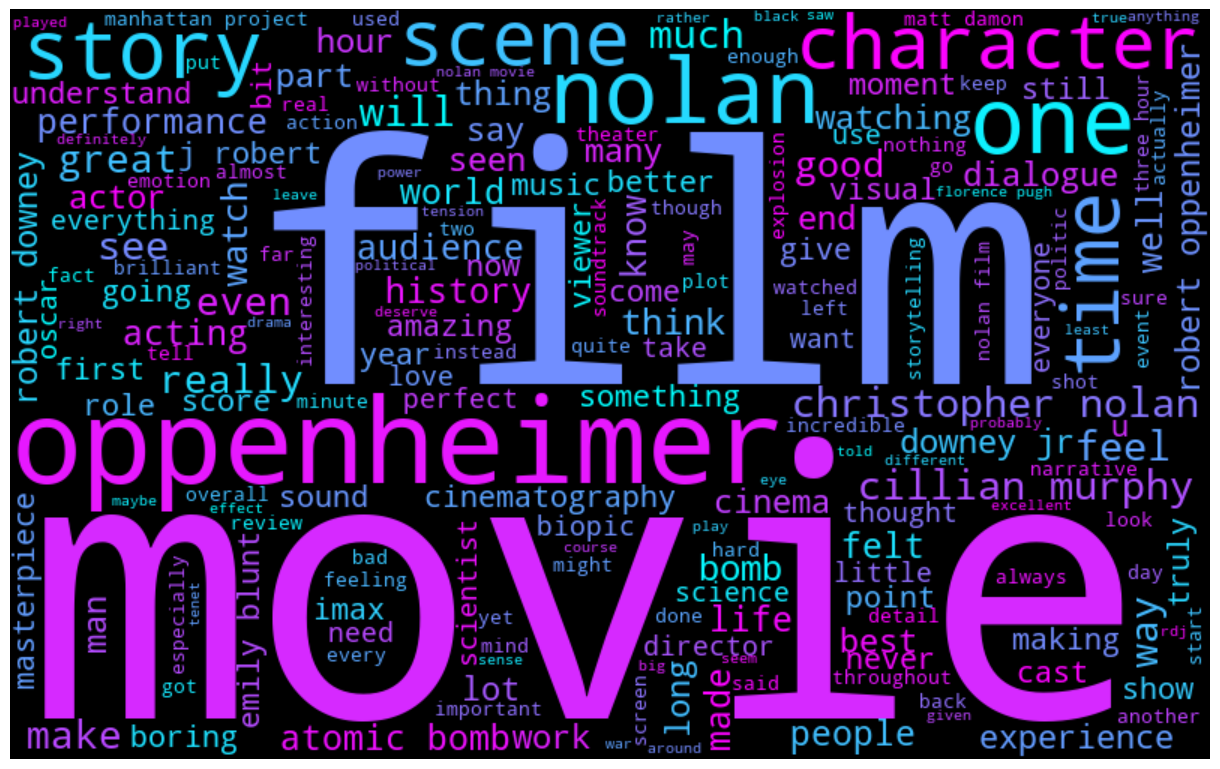

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Concatenating all review text
comment_words = ' '.join(str(val).lower() for val in df.review)

# Create a set of stopwords
stopwords = set(STOPWORDS)

# Create a WordCloud object
color_map = 'cool'
wordcloud = WordCloud(width=800, height=500,
                      background_color='black', colormap=color_map,
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# Plot the WordCloud image
plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Display the WordCloud
plt.show()

### The enlarged prominence of terms like "movie," "film," and "Nolan" in the WordCloud provides insights into the core focus of "Oppenheimer" IMDb reviews. "Movie" and "film" highlight discussions about the cinematic experience, while "Nolan" suggests interest in Christopher Nolan's role. This indicates engagement with both the movie's presentation and its alignment with Nolan's style. The significance of these terms signifies active conversations about storytelling, direction, and potential comparisons.

# <font color='#e53d31'>2.2. Rating Counts</font>

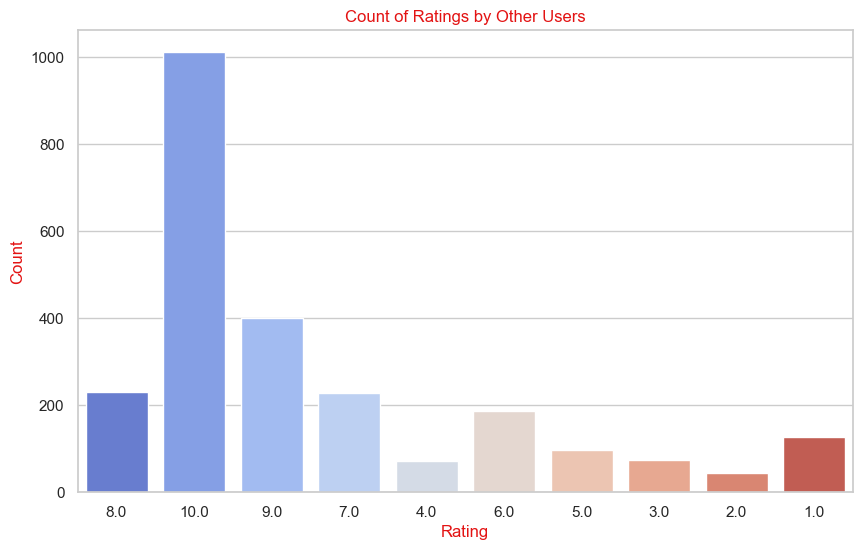

In [10]:
# Setting the style for the plot
sns.set(style="whitegrid")

# Creating the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='coolwarm')

# Adding labels and title
plt.xlabel('Rating', color='#e31313')
plt.ylabel('Count', color='#e31313')
plt.title('Count of Ratings by Other Users', color='#e31313')

# Displaying the plot
plt.show()

### Reviews with a rating of 10 are the highest, indicating a strong positive sentiment. The movie has garnered an overall positive rating, reflecting its favorable reception among viewers.

### Rule-based Approach
This is a practical approach for analyzing text without training or using Machine Learning models. The result of this approach is a set of rules based on which the text is labelled as positive/neutral/negative. These rules are also called Lexicons and the approach is Lexicons based approach.

# <font color='#e53d31'>3. Data Pre-Processing Steps</font>
 1. Cleaning the Text
 2. Tokenization
 3. Enrichment - POS tagging
 4. Stopwords Removal
 5. Obtaining the Stem Words (Stemming and Lemmatization)

## <font color='#e53d31'>3.1. Cleaning the Text</font>
We will utilize the regular expressions `re` to remove non-alphabetic characters and numericals, leaving behind only the alphabets in the text. 

In [11]:
import re # regular expression for pattern matching and text manipulation.

# defining a function to clean the text
def clean(text):
    # removing all the special characters and numericals leaving with alphabets
    text = re.sub('[^A-Za-z]',' ', str(text))
    return text

# cleaning the text in review column
df['Cleaned_reviews'] = df['review'].apply(clean)
df.head()

,title,rating,review,Cleaned_reviews
0,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...,Everybody involved with the production of Opp...
1,Cinematic masterpiece,10.0,Nolan is back and delivers a fast paced thrill...,Nolan is back and delivers a fast paced thrill...
2,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...,Greetings again from the darkness As pupils s...
3,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...,Dr J Robert Oppenheimer the creator of Atomic...
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...,As VFX and special effects take over the tradi...


## <font color='#e53d31'>3.2. Tokenization</font>
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).
## <font color='#e53d31'>3.3. Enrichment - POS tagging</font>
Part-of-Speech (POS) tagging is performed using the pos_tag function from the nltk library. It assigns a part-of-speech tag (like noun, verb, adjective, etc.) to each word in the tokenized review.                                
POS tagging is essential to preserve the context of the word and is essential for Lemmatization.
## <font color='#e53d31'>1.4. Stopwords Removal</font>
Stopwords in English are words that carry very little useful information. They are common words like "the," "is," "and," etc., that occur frequently in the text but carry little or no meaning.                               
We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.
## <font color='#e53d31'>1.5. Obtaining the Stem Words (Stemming and Lemmatization)</font>
Stemming and Lemmatization are techniques used to reduce words to their base or root form.               
The key difference is :

**Stemming often gives some meaningless root words as it simply chops off some characters in the end.** 

**Lemmatization gives meaningful root words, however, it requires POS tags of the words.**

# <font color='#e53d31'>NLTK</font>
NLTK (Natural Language Toolkit) stands as a leading platform, empowering Python developers to efficiently handle human language data. It offers intuitive interfaces, providing access to an extensive collection of over 50 corpora and lexical resources, including the esteemed WordNet.

One of NLTK's key strengths lies in its comprehensive suite of text processing libraries, equipped to handle tasks like classification, tokenization, stemming, tagging, parsing, and semantic reasoning. Additionally, it simplifies integration with robust Natural Language Processing (NLP) libraries used in industrial applications.

The versatility of NLTK makes it a compelling choice for professionals seeking to delve into advanced language analysis and harness the potential of human language data for a myriad of applications.

In [12]:
import nltk

#nltk.download('punkt') # downloading punkt tokeziner
"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model
for abbreviation words, collocations, and words that start sentences. """

from nltk.tokenize import word_tokenize # importing word_tokenize package using nltk.tokenize library
from nltk import pos_tag # part_of_speech tag for converting each token into a tuple having form(word, tag)

#nltk.download('stopwords') # downloading Stopwords 
from nltk.corpus import stopwords # importing stopwords for removing meaningless text

#nltk.download('wordnet') # downloading wordnet 
from nltk import wordnet

In [13]:
# POS tagger dictionary
pos_dict = {'J': wordnet.wn.ADJ, 'V':wordnet.wn.VERB, 'N':wordnet.wn.NOUN, 'R':wordnet.wn.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print tags
    
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            #print(tag[0])
            #print(pos_dict.get(tag[0]))
    return newlist

df['POS_tagged'] = df['Cleaned_reviews'].apply(token_stop_pos)
df.head()

,title,rating,review,Cleaned_reviews,POS_tagged
0,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...,Everybody involved with the production of Opp...,"[(Everybody, n), (involved, v), (production, n..."
1,Cinematic masterpiece,10.0,Nolan is back and delivers a fast paced thrill...,Nolan is back and delivers a fast paced thrill...,"[(Nolan, n), (back, r), (delivers, v), (fast, ..."
2,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...,Greetings again from the darkness As pupils s...,"[(Greetings, n), (darkness, n), (pupils, n), (..."
3,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...,Dr J Robert Oppenheimer the creator of Atomic...,"[(Dr, n), (J, n), (Robert, n), (Oppenheimer, n..."
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...,As VFX and special effects take over the tradi...,"[(VFX, n), (special, a), (effects, n), (take, ..."


In [14]:
# Obtaining the stem words - Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_new = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_new = lemma_new + " " + lemma
        else:
            lemma = wordnet_lem.lemmatize(word, pos=pos)
            lemma_new = lemma_new + " " + lemma
    return lemma_new

df['Lemma'] = df['POS_tagged'].apply(lemmatize)
df.head()

,title,rating,review,Cleaned_reviews,POS_tagged,Lemma
0,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...,Everybody involved with the production of Opp...,"[(Everybody, n), (involved, v), (production, n...",Everybody involve production Oppenheimer wor...
1,Cinematic masterpiece,10.0,Nolan is back and delivers a fast paced thrill...,Nolan is back and delivers a fast paced thrill...,"[(Nolan, n), (back, r), (delivers, v), (fast, ...",Nolan back deliver fast pace thrill biopic l...
2,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...,Greetings again from the darkness As pupils s...,"[(Greetings, n), (darkness, n), (pupils, n), (...",Greetings darkness pupil slouch school desk ...
3,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...,Dr J Robert Oppenheimer the creator of Atomic...,"[(Dr, n), (J, n), (Robert, n), (Oppenheimer, n...",Dr J Robert Oppenheimer creator Atomic Bomb ...
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...,As VFX and special effects take over the tradi...,"[(VFX, n), (special, a), (effects, n), (take, ...",VFX special effect take traditional filmmaki...


In [15]:
# Viewing Movie Reviews and Lemmatized column (Lemma)
df[['review','Lemma']]

,review,Lemma
0,Everybody involved with the production of 'Opp...,Everybody involve production Oppenheimer wor...
1,Nolan is back and delivers a fast paced thrill...,Nolan back deliver fast pace thrill biopic l...
2,Greetings again from the darkness. As pupils s...,Greetings darkness pupil slouch school desk ...
3,Dr. J Robert Oppenheimer the creator of Atomic...,Dr J Robert Oppenheimer creator Atomic Bomb ...
4,As VFX and special effects take over the tradi...,VFX special effect take traditional filmmaki...
...,...,...
2465,The movie was fine honestly not my favorite. W...,movie fine honestly favorite element costume...
2466,"Acting, Production design is good but they gav...",Acting Production design good give much hype...
2467,As an Indian adult this movie is great or kind...,Indian adult movie great kinda good nude par...
2468,180minutes is just for conversation. No action...,minute conversation action Slow pace like sn...


# <div style="text-align:center"><h1><font color='#e53d31'>Sentiment Analysis Using VADER</font></h1></div>
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a popular lexicon and rule-based sentiment analysis tool. Developed for analyzing social media texts and informal language data, VADER utilizes a pre-labeled lexicon of words with sentiment scores, distinguishing between positive, negative, and neutral words.                                                           

VADER is widely used for quick sentiment analysis, particularly in informal text settings such as social media platforms. Although it offers simplicity and convenience, considering the context and nature of the text is essential for optimal performance.

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [17]:
# function to calculate vader Sentiment
def vadersia(review):
    vs = sia.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersia)
df.head()

,title,rating,review,Cleaned_reviews,POS_tagged,Lemma,Sentiment
0,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...,Everybody involved with the production of Opp...,"[(Everybody, n), (involved, v), (production, n...",Everybody involve production Oppenheimer wor...,0.9991
1,Cinematic masterpiece,10.0,Nolan is back and delivers a fast paced thrill...,Nolan is back and delivers a fast paced thrill...,"[(Nolan, n), (back, r), (delivers, v), (fast, ...",Nolan back deliver fast pace thrill biopic l...,0.9246
2,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...,Greetings again from the darkness As pupils s...,"[(Greetings, n), (darkness, n), (pupils, n), (...",Greetings darkness pupil slouch school desk ...,0.9981
3,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...,Dr J Robert Oppenheimer the creator of Atomic...,"[(Dr, n), (J, n), (Robert, n), (Oppenheimer, n...",Dr J Robert Oppenheimer creator Atomic Bomb ...,0.9785
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...,As VFX and special effects take over the tradi...,"[(VFX, n), (special, a), (effects, n), (take, ...",VFX special effect take traditional filmmaki...,0.8750


In [18]:
# Changing the data-type of rating column from object to float64
df['rating'] = df['rating'].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2470 non-null   object 
 1   rating           2470 non-null   float64
 2   review           2470 non-null   object 
 3   Cleaned_reviews  2470 non-null   object 
 4   POS_tagged       2470 non-null   object 
 5   Lemma            2470 non-null   object 
 6   Sentiment        2470 non-null   float64
dtypes: float64(2), object(5)
memory usage: 135.2+ KB


In [19]:
# Compound Analysis based on Sentiment Score and Ratings
def vader_analysis(compound, rating):
    if compound >= 0.6 and rating >= 6.0:
        return 'Positive'
    elif compound < 0.2 and rating <= 3.0:
        return 'Negative'
    else:
        return 'Neutral'

# Assuming you have the 'Sentiment' and 'Rating' columns in your DataFrame
df['Analysis'] = df.apply(lambda row: vader_analysis(row['Sentiment'], row['rating']), axis=1)

In [20]:
df = df.drop(['Cleaned_reviews','POS_tagged','Lemma','Sentiment'], axis=1)
df

,title,rating,review,Analysis
0,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...,Positive
1,Cinematic masterpiece,10.0,Nolan is back and delivers a fast paced thrill...,Positive
2,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...,Positive
3,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...,Positive
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...,Positive
...,...,...,...,...
2465,"Ehhh, definitely worth trying",7.0,The movie was fine honestly not my favorite. W...,Positive
2466,Insulting Bhagavad Gita is Everything in this ...,1.0,"Acting, Production design is good but they gav...",Negative
2467,As an Indian,7.0,As an Indian adult this movie is great or kind...,Positive
2468,ALL 180 MINUTES FOR CONVERSATION ONLY!!,1.0,180minutes is just for conversation. No action...,Negative


In [21]:
vader_count = df['Analysis'].value_counts()
vader_count

Positive    1739
Neutral      616
Negative     115
Name: Analysis, dtype: int64

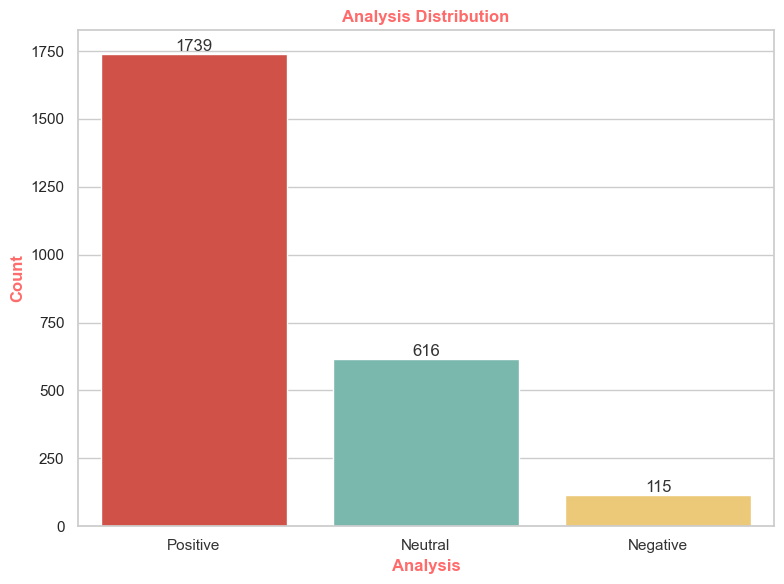

In [26]:
# Calculate the distribution of analysis categories
analysis_dist = df['Analysis'].value_counts()

# Set a custom color palette
custom_palette = ['#E53D31', '#70C1B3', '#FFD166']  # Red, Teal, Yellow

# Plotting bar chart using seaborn with custom colors
plt.figure(figsize=(8, 6))
sns.set_palette(custom_palette)
sns.barplot(x=analysis_dist.index, y=analysis_dist.values)

# Adding count values on top of bars
for idx, count in enumerate(analysis_dist.values):
    plt.text(idx, count, str(count), ha='center', va='bottom', fontsize=12, color='#333333')

# Adding labels and title with bold and colorful font
plt.xlabel('Analysis', color='#FF6B6B', fontweight='bold')
plt.ylabel('Count', color='#FF6B6B', fontweight='bold')
plt.title('Analysis Distribution', color='#FF6B6B', fontweight='bold')
plt.xticks(rotation=0, color='#333333')

# Display the plot
plt.tight_layout()
plt.show()

In [24]:
# Looking at Negative Reviews
df[df["Analysis"] == "Negative"]

,title,rating,review,Analysis
79,Boring and without science,3.0,First of all- they left out the science and th...,Negative
129,Three hours of not so much,3.0,For me this movie doesn't do anything. The act...,Negative
179,O God.,3.0,Nolan is gifted at writing in such a way that ...,Negative
219,Beyond Tedious - A Wasted Opportunity,3.0,This is one of the most amazing and fascinatin...,Negative
389,OPPEN-SHITER MORE LIKE,2.0,I for one can not understand how christopher n...,Negative
...,...,...,...,...
2450,Hearing loss after 5 minutes of previews in Imax,1.0,"Went to see oppenheimer imax this morning, cou...",Negative
2456,extremly boring !,1.0,I rarely write a review ..but this time i coul...,Negative
2460,What a RUBBISH,1.0,Nolan is done. I just can't understand why peo...,Negative
2466,Insulting Bhagavad Gita is Everything in this ...,1.0,"Acting, Production design is good but they gav...",Negative


([<matplotlib.patches.Wedge at 0x14afab1d0d0>,
 [Text(-0.6578300244126571, 0.8816233090051799, 'Positive'),
  Text(0.522311208312685, -0.968086257350523, 'Neutral'),
  Text(1.3355844572892002, -0.19675913561385974, 'Negative')],
 [Text(-0.3588163769523584, 0.48088544127555266, '70.4%'),
  Text(0.28489702271601, -0.5280470494639216, '24.9%'),
  Text(0.8409235471820888, -0.12388538168280057, '4.7%')])

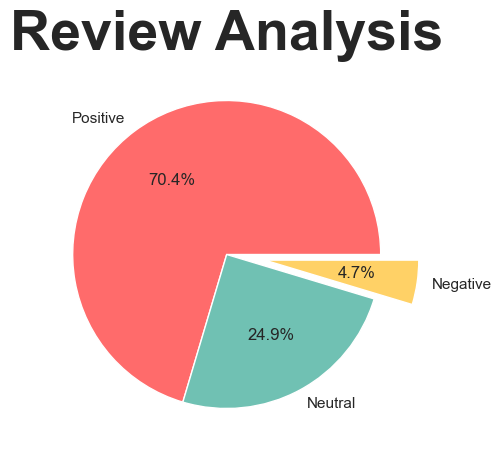

In [25]:
# Pie chart for Analysis Distribution
plt.figure(figsize = (10,5))
plt.title('Review Analysis', fontweight = 'bold', fontsize = 40)
plt.pie(vader_count.values, labels=vader_count.index, explode = (0,0,0.25), autopct='%1.1f%%', shadow=False)

### <font color='#e53d31'>The pie chart succinctly reveals the Sentiment distribution among reviews, showcasing a dominant Positive Sentiment at `70.4%`. 
### <font color='#e53d31'>Neutral sentiments account for `24.9%`, while Negative sentiments are comparatively lower at `4.7%`. This breakdown provides a quick overview of the audience's predominantly positive reception of the movie, with a balanced mix of neutral viewpoints and a smaller negative sentiment portion.</font>